In [1]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import os
import jieba

1月


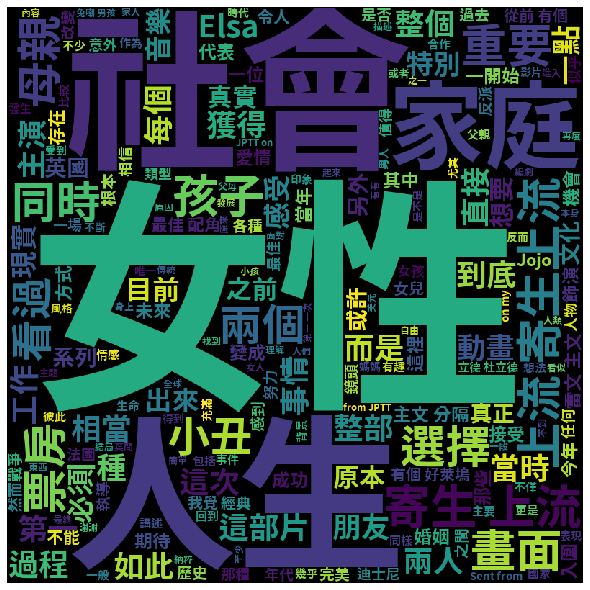

2月


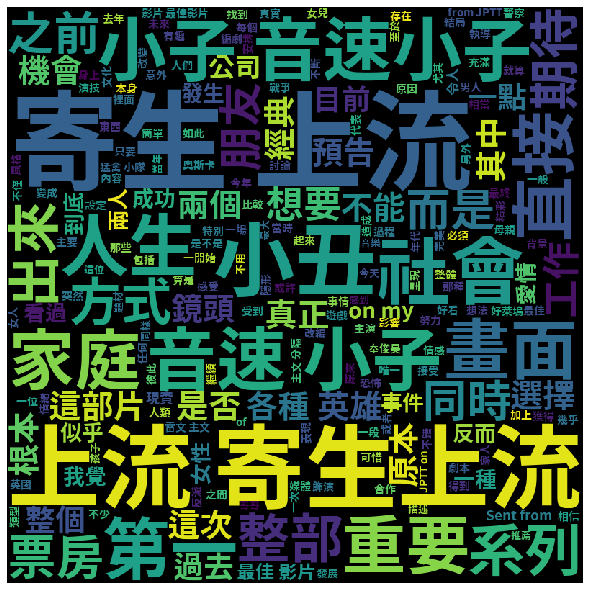

3月


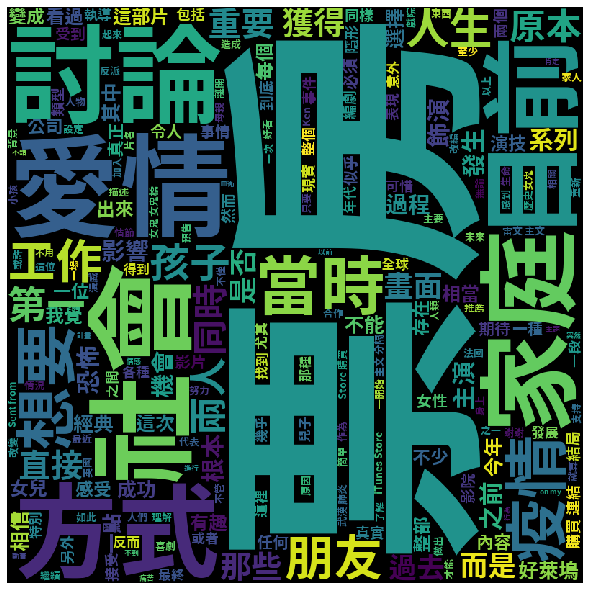

4月


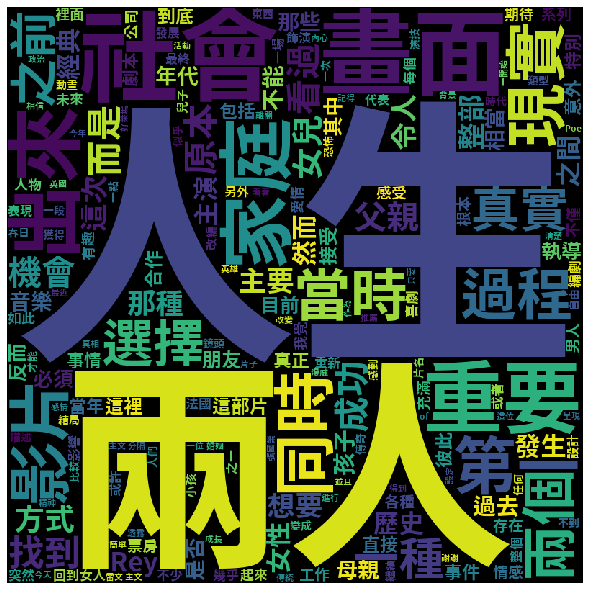

5月


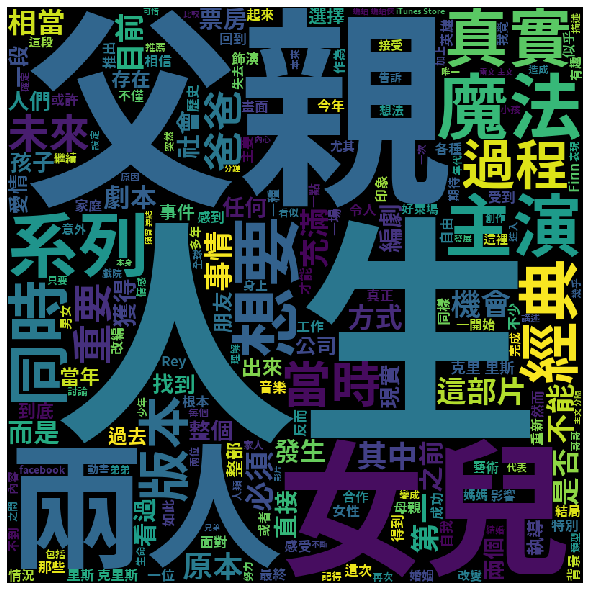

6月


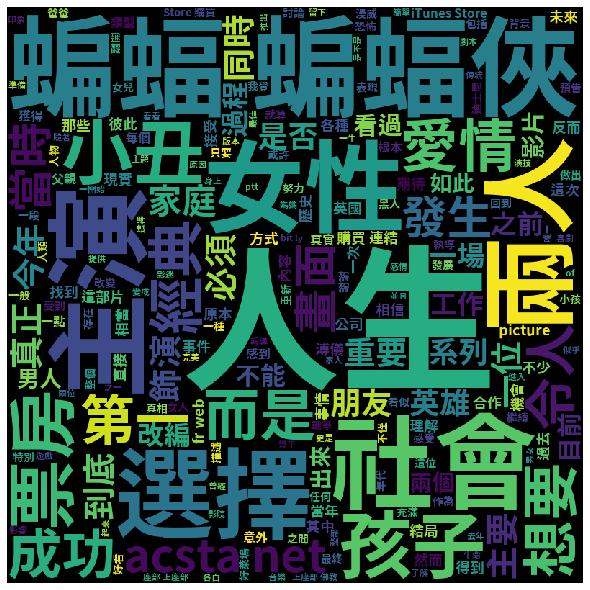

7月


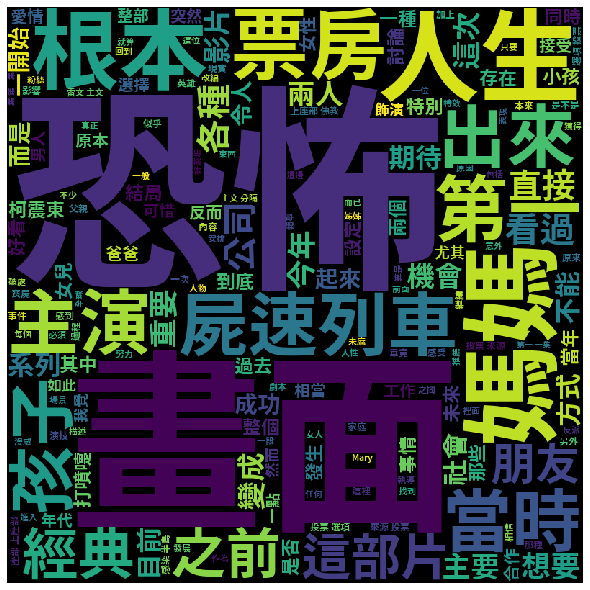

8月


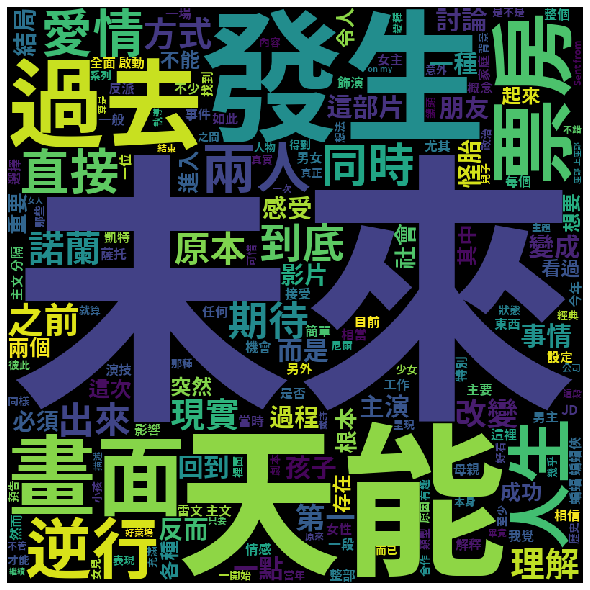

9月


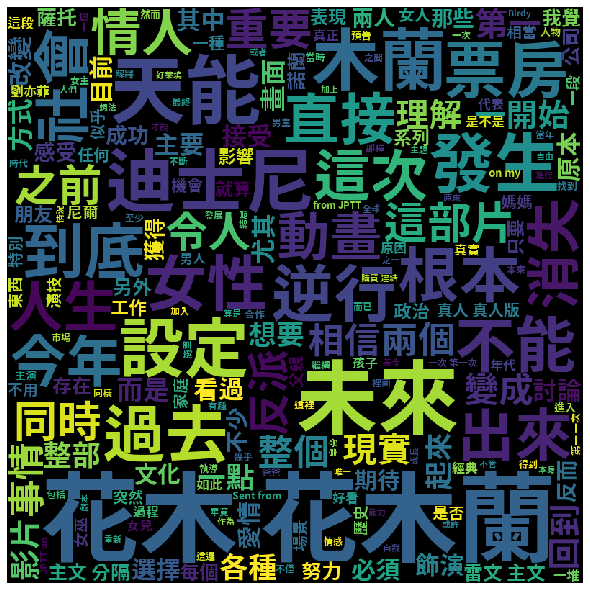

10月


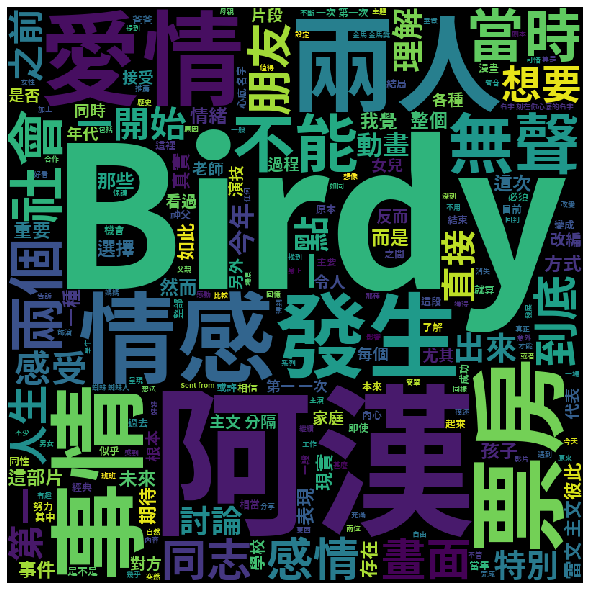

11月


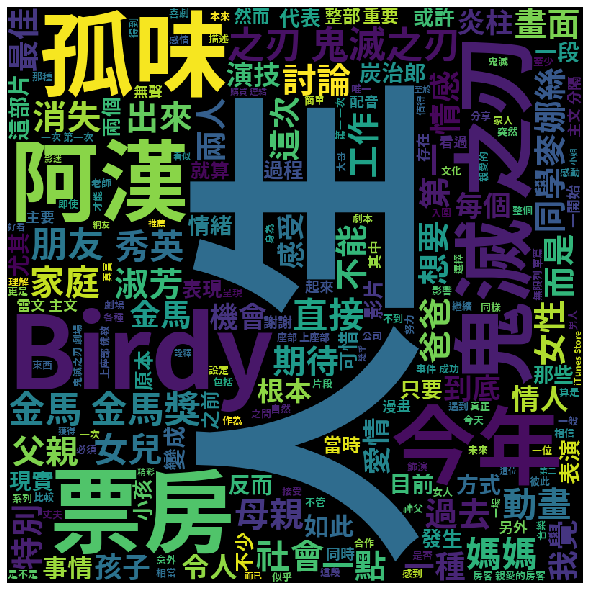

12月


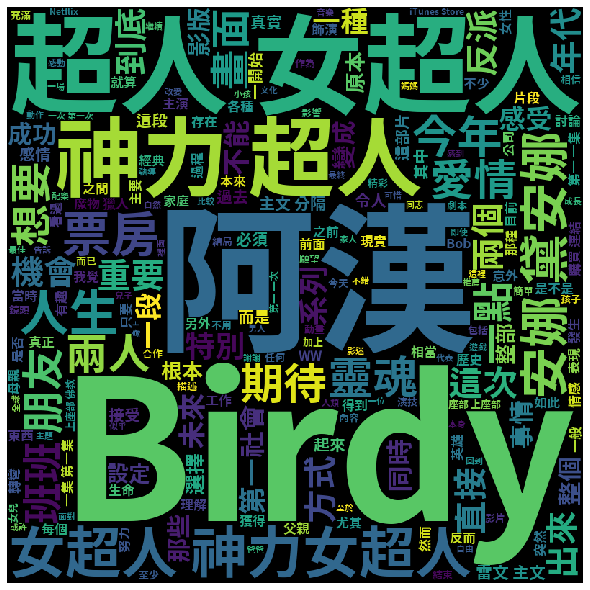

In [9]:
stopwords = []
with open("./PTT_movie_stopwords.txt", "r", encoding="utf-8") as f:
    all_lines = f.readlines()
    for line in all_lines:
        stopwords.append(line.replace("\n",""))
    
        
for month in range(1,13):
    
    path = "./ptt_movies/2020-{}/".format(str(month).zfill(2))
    article_list = os.listdir(path)
    
    
    text = ""
    jieba.load_userdict("./PTT_movie_dict.txt")
    for article in article_list:
        with open(path + article, "r", encoding="utf-8") as f:
            content = f.readlines()
            text += "".join(content[9:])
    jieba_text = jieba.cut_for_search(text)
    text_for_cloud = " ".join(jieba_text)
    text_list = text_for_cloud.split(" ")
    
    for w in text_list:
        if len(w) < 2:
            stopwords.append(w)
    
    font = r'C:\Users\MardyMardy\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\TaipeiSansTCBeta-Bold.ttf'
    
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='black', 
                    stopwords = stopwords,
                    font_path = font,
                    min_font_size = 10).generate(text_for_cloud) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    
    print(str(month) + "月")
    plt.savefig("./{}月".format(str(month)))
    plt.show()
    